# WorkFlow :

1.EDA
2.Text Processing/Cleaning
   - Remove Stop words
   - Remove punctuation
   - Remove hashtags etc
3.Encoding
   - Start with TFIDF Vectorizer
   - Word2Vec Embedding
       - Probably try this first and if time permits explore next two.
   - Glove Word Embedding
   - Fast Text word Embedding
4.Handling Imbalance
   - Measure the performance before and after handling Imbalace
   - SMOTE can be used for this
       - Oversampling and undersampling minority class
5.ML Models
   - Start with Logistic Regression
   - Random Forest
   - XGBoost,Catboost etc
   - Naive Bayes
   - Deep Learning Models
   - LSTM
   - RNN
6.Use Grid Search/Random Search to tune Hyperparameters
   - Cross Validation using K-Fold
7.Deploy phase - deploy the best model
   - Containerize
   - Docker
   - Build API
   - Build Web GUI/ interface to text out the Model

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer 
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
import re

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, f1_score, auc, roc_auc_score, roc_curve, recall_score,precision_score, precision_recall_curve # Performance Metrics
from imblearn.over_sampling import SMOTE


import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../Data/Airline_Data/Tweets.csv.zip')
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

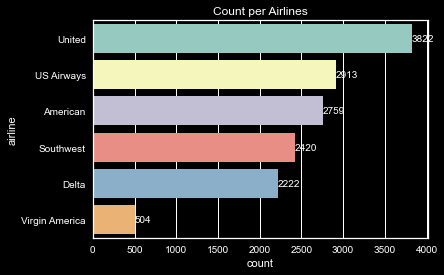

In [6]:
ax = sns.countplot(data = df, y = 'airline',
                   order = df.airline.value_counts().index)
ax.bar_label(ax.containers[0])
ax.set_title('Count per Airlines',)
                                    
plt.show()

In [7]:
# Check for Null values in the data set per coloumn
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

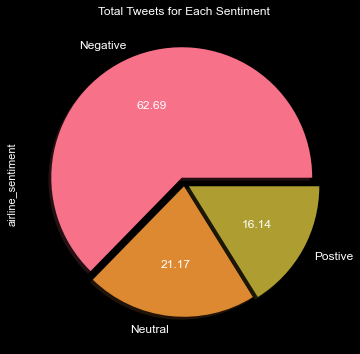

In [8]:
ax.set_title(label = 'Total number of sentiments of tweets:')
colors=sns.color_palette('husl',10)
pd.Series(df['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Postive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total Tweets for Each Sentiment")

plt.show()

Total number of sentiments of tweets :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


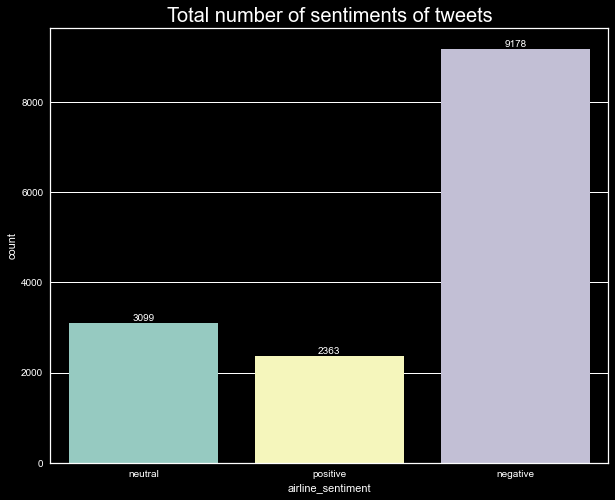

In [9]:
print("Total number of sentiments of tweets :")
print(df.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df)
ax.bar_label(ax.containers[0])
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

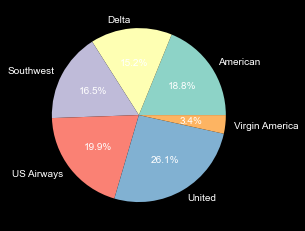

In [10]:
# Ratio of Planes
label=['American', 'Delta', 'Southwest', 'US Airways', 'United',
       'Virgin America']
plt.pie(df.groupby('airline')['airline_sentiment'].count(),autopct="%.1f%%",labels=label)
plt.show()

In [11]:
# Create a dataframe filtering out 
airline_sentiment_df = df.groupby(['airline','airline_sentiment'])['airline_sentiment'].count().unstack()
airline_sentiment_df

airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152

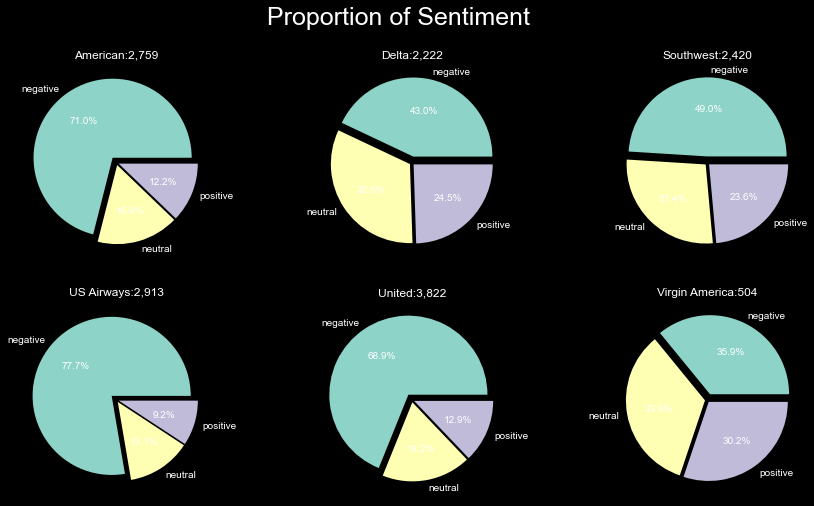

In [12]:
fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()

for i, ax in zip(range(0, 6), axes):
    temp = airline_sentiment_df.iloc[i]
    ax.pie(x = temp, labels = temp.index, autopct = '%1.1f%%', explode = [0.08, 0.03, 0.03])
    ax.set_title(f"{airline_sentiment_df.index[i]}:{format(airline_sentiment_df.values[i].sum(),',')}")

plt.suptitle("Proportion of Sentiment", fontsize = 25)    
plt.show()

In [13]:
df_neg = df[df.airline_sentiment == 'negative']
display(df_neg.shape, df_neg.head())

(9178, 15)

tweet_id airline_sentiment  airline_sentiment_confidence  \
3   570301031407624196          negative                        1.0000   
4   570300817074462722          negative                        1.0000   
5   570300767074181121          negative                        1.0000   
15  570282469121007616          negative                        0.6842   
17  570276917301137409          negative                        1.0000   

   negativereason  negativereason_confidence         airline  \
3      Bad Flight                     0.7033  Virgin America   
4      Can't Tell                     1.0000  Virgin America   
5      Can't Tell                     0.6842  Virgin America   
15    Late Flight                     0.3684  Virgin America   
17     Bad Flight                     1.0000  Virgin America   

   airline_sentiment_gold             name negativereason_gold  retweet_count  \
3                     NaN         jnardino                 NaN              0   
4                     NaN         jnardino                 NaN              0   
5                     NaN         jnardino                 NaN              0   
15                    NaN  smartwatermelon                 NaN              0   
17                    NaN    heatherovieda                 NaN              0   

                                                 text tweet_coord  \
3   @VirginAmerica it's really aggressive to blast...         NaN   
4   @VirginAmerica and it's a really big bad thing...         NaN   
5   @VirginAmerica seriously would pay $30 a fligh...         NaN   
15      @VirginAmerica SFO-PDX schedule is still MIA.         NaN   
17  @VirginAmerica  I flew from NYC to SFO last we...         NaN   

                tweet_created         tweet_location  \
3   2015-02-24 11:15:36 -0800                    NaN   
4   2015-02-24 11:14:45 -0800                    NaN   
5   2015-02-24 11:14:33 -0800                    NaN   
15  2015-02-24 10:01:50 -0800          palo alto, ca   
17  2015-02-24 09:39:46 -0800  this place called NYC   

                 user_timezone  
3   Pacific Time (US & Canada)  
4   Pacific Time (US & Canada)  
5   Pacific Time (US & Canada)  
15  Pacific Time (US & Canada)  
17  Eastern Time (US & Canada)

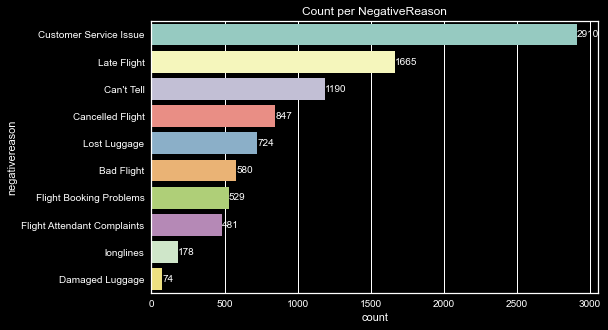

In [14]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data = df_neg, y = 'negativereason',
                   order = df_neg.negativereason.value_counts().index)

ax.bar_label(ax.containers[0])
ax.set_title('Count per NegativeReason')

plt.show()

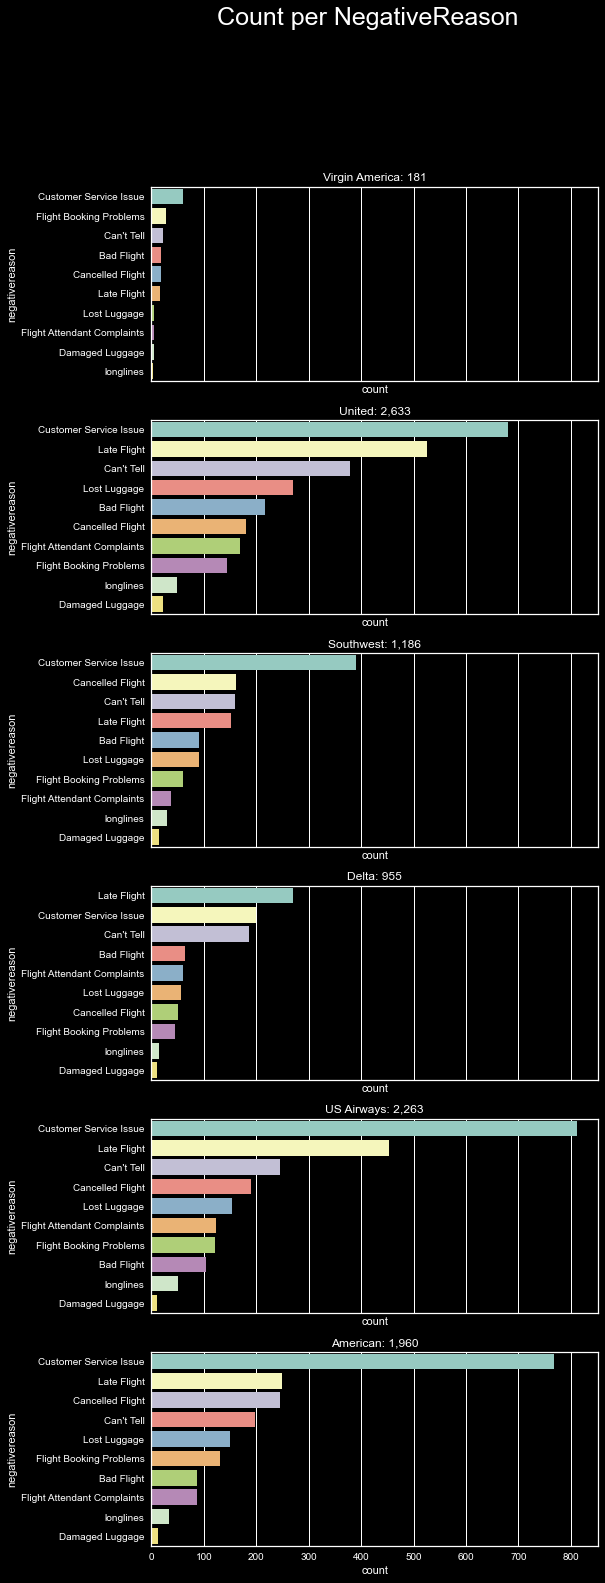

In [15]:
# Looks like Customer Service is the most common Negative Reason then Late Flight
# Let's try to divide this based on airlines
fig, axes = plt.subplots(6, 1, figsize=(8, 25), sharex=True)
axes = axes.flatten()
names = df_neg['airline'].unique()

for name, i in zip(names, axes):
    ax = sns.countplot(data=df_neg[df_neg.airline == name], y = 'negativereason',
                        order = df_neg[df_neg.airline == name].negativereason.value_counts().index,ax=i)
    ax.set_title(f"{name}: {format(len(df_neg[df_neg.airline == name]),',')}")

plt.suptitle("Count per NegativeReason", fontsize = 25)
plt.show()

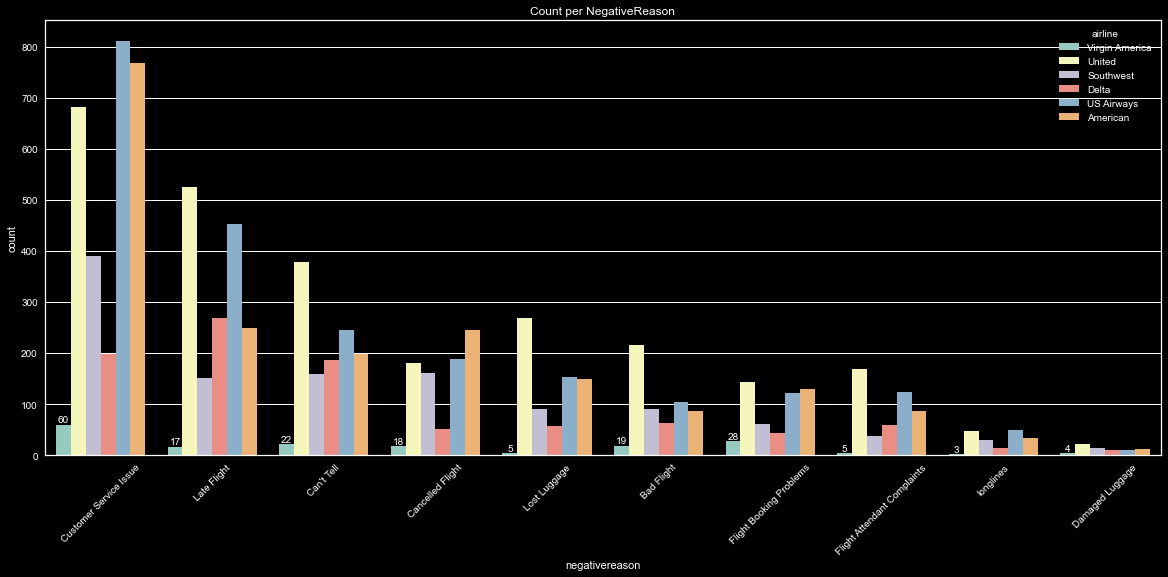

In [16]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df_neg, x = 'negativereason',
                   order = df_neg.negativereason.value_counts().index, hue = 'airline')

ax.bar_label(ax.containers[0])
ax.set_title('Count per NegativeReason')
plt.xticks(rotation=45)
plt.show()

In [17]:
positive=df[df['airline_sentiment']=='positive'].text
neutral=df[df['airline_sentiment']=='neutral'].text
negative=df[df['airline_sentiment']=='negative'].text

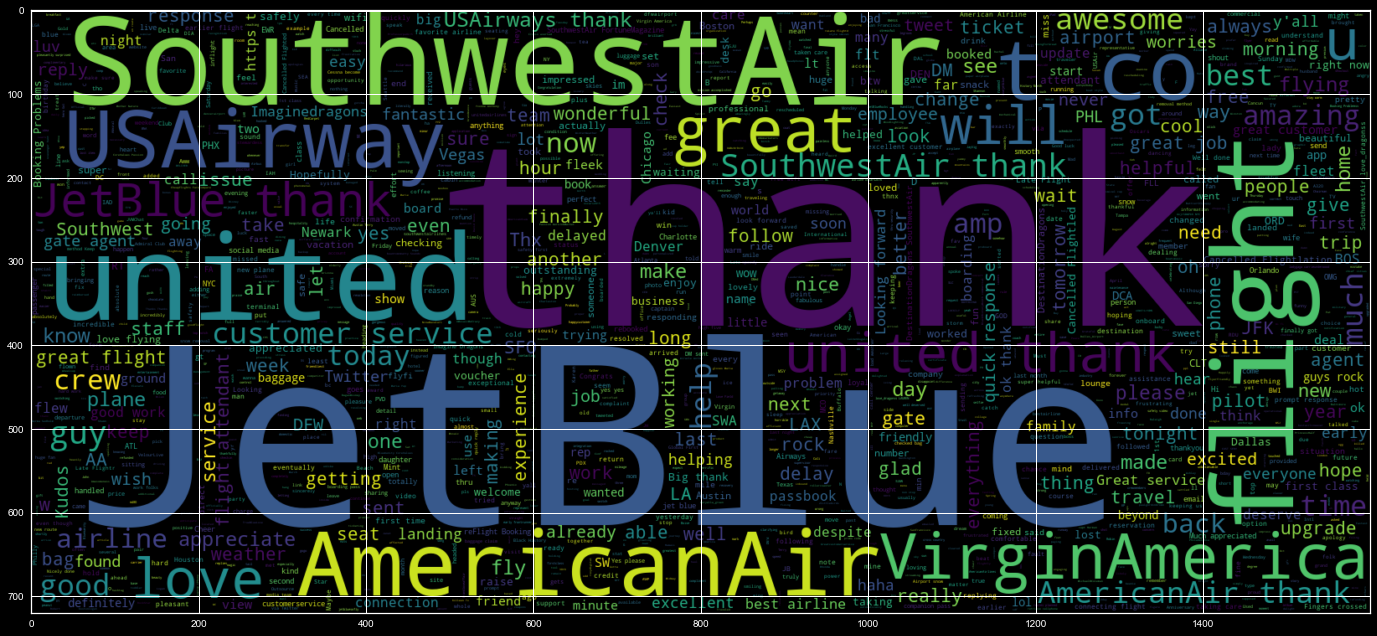

In [18]:
# Wordcloud for Positive
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

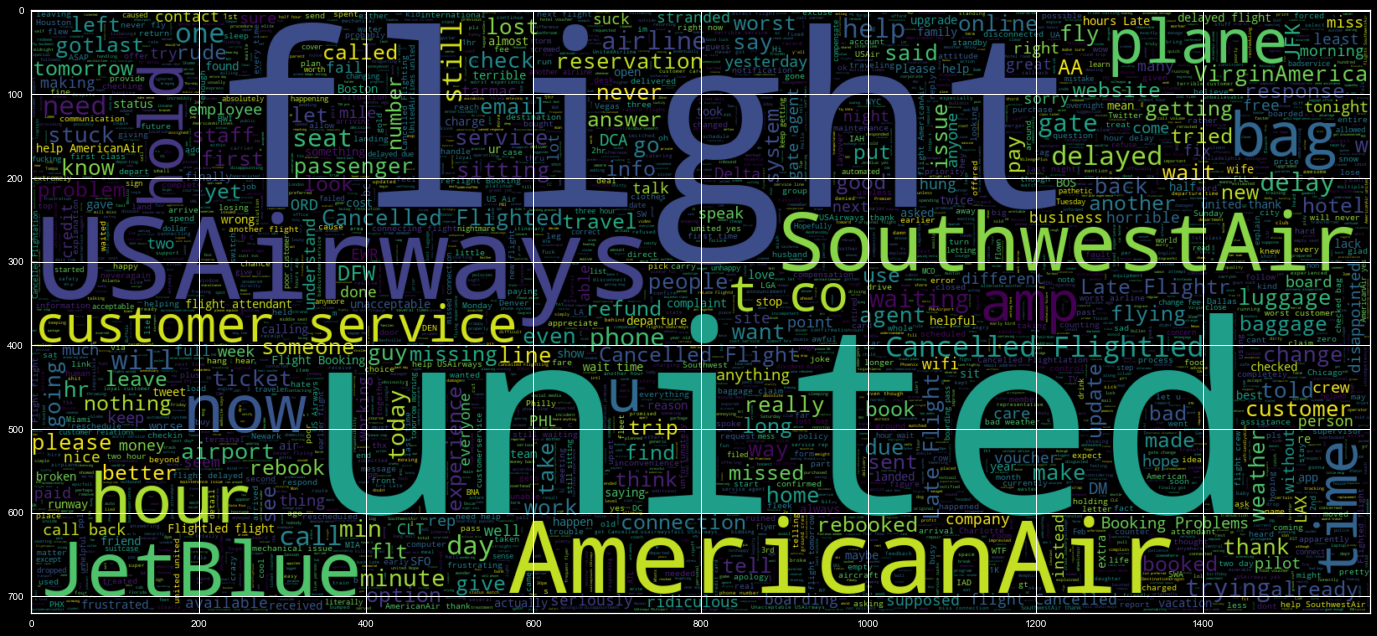

In [19]:
# Wordclpud for Negative
plt.figure(figsize=(24,20))
world_cloud_negative=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(negative))
plt.imshow(world_cloud_negative,interpolation='bilinear')
ax.grid(False)

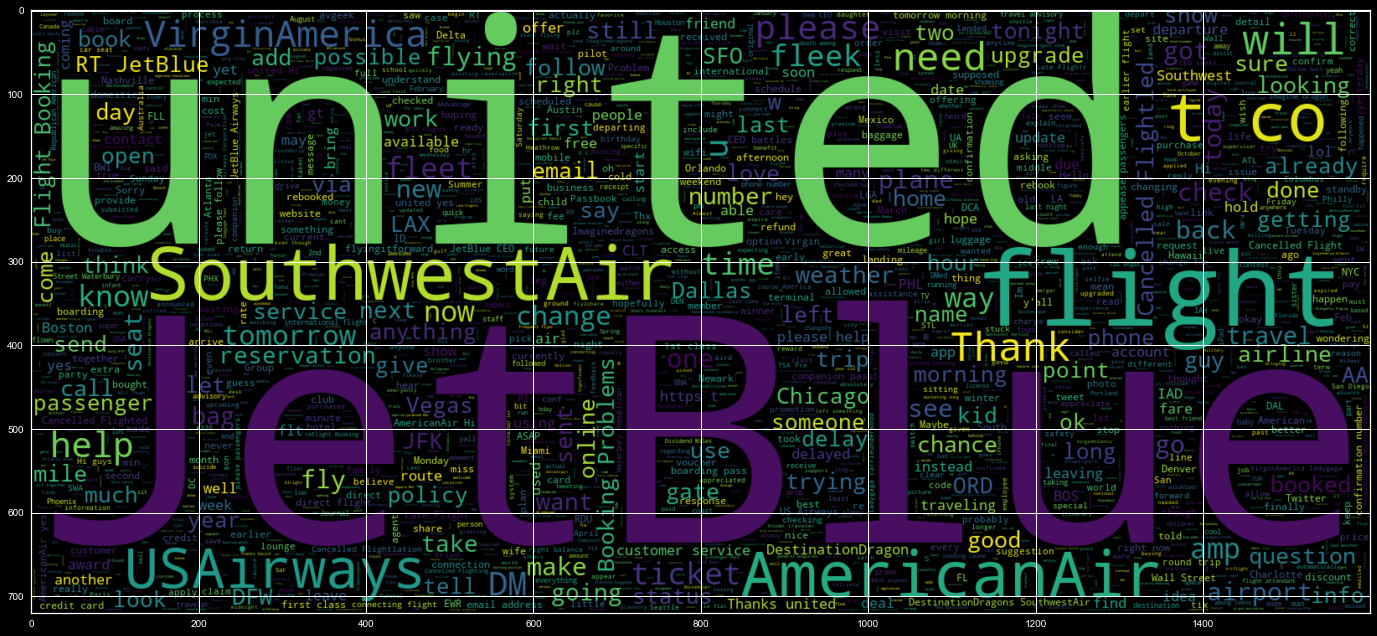

In [20]:
# Wordclpud for Neutral
plt.figure(figsize=(24,20))
world_cloud_neutral=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(neutral))
plt.imshow(world_cloud_neutral,interpolation='bilinear')
ax.grid(False)

In [21]:
# we need to convert to encoded sentiment
def convert_sentiment(sentiment):
    if sentiment == 'positive':
        return 2
    elif sentiment == 'negative':
        return 0
    elif sentiment == 'neutral':
        return 1

In [22]:
# Apply convert_Sentiment function
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_sentiment(x))
df.head()

tweet_id  airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513                  1                        1.0000   
1  570301130888122368                  2                        0.3486   
2  570301083672813571                  1                        0.6837   
3  570301031407624196                  0                        1.0000   
4  570300817074462722                  0                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [23]:
df['final_text'] = df['text']

In [24]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# # combaine negative reason with  tweet (if exsist)
# df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text'] 


# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

In [25]:
df.head()

tweet_id  airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513                  1                        1.0000   
1  570301130888122368                  2                        0.3486   
2  570301083672813571                  1                        0.6837   
3  570301031407624196                  0                        1.0000   
4  570300817074462722                  0                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

                                          final_text  
0                                               said  
1            plus added commercials experience tacky  
2             today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing

In [26]:
X = df['final_text']
y = df['airline_sentiment']

In [27]:
# Apply TFDIF

tfid = TfidfVectorizer(use_idf=True, lowercase=True)
X_tfid =  tfid.fit_transform(X)

In [28]:
tfid.get_feature_names()

['aa',
 'aadavantage',
 'aadelay',
 'aadv',
 'aadvantage',
 'aafail',
 'aal',
 'aalwayslate',
 'aand',
 'aaron',
 'aateam',
 'ab',
 'aback',
 'abandon',
 'abandoned',
 'abandonment',
 'abassinet',
 'abbreve',
 'abc',
 'abcletjetbluestreamfeed',
 'abcnews',
 'abducted',
 'abi',
 'abilities',
 'ability',
 'able',
 'aboard',
 'aboout',
 'abounds',
 'abq',
 'abroad',
 'absolute',
 'absolutely',
 'absorb',
 'absorber',
 'absoulutely',
 'absurd',
 'absurdity',
 'absurdly',
 'abt',
 'abundance',
 'abuse',
 'abused',
 'abysmal',
 'ac',
 'acarl',
 'acc',
 'accelerate',
 'accept',
 'acceptable',
 'accepted',
 'accepting',
 'acces',
 'access',
 'accessibility',
 'accessible',
 'accessing',
 'accident',
 'accidentally',
 'accidents',
 'accomidating',
 'accommodate',
 'accommodated',
 'accommodates',
 'accommodating',
 'accommodation',
 'accommodations',
 'accompaniments',
 'accompany',
 'accomplish',
 'accomplished',
 'according',
 'accordingly',
 'account',
 'accountability',
 'accountable',
 'ac

In [29]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'negative', 
                                        1: 'neutral', 
                                        2: 'positive'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

In [30]:
# Utility Function

def check_scores(classifier, X_train, X_test, y_train, y_test):
    print ("\t\t",classifier.__class__.__name__)
    fit = classifier.fit(X_train, y_train)
    predict = classifier.predict(X_test)
    accuracy = accuracy_score(predict,y_test)
    
    print("Accuracy Score : {0}".format(accuracy))
    
    print("\n")
    print(classification_report(y_test, predict))
    print("\n")
    
    print("Confusion Matrix : ")
    cm = confusion_matrix(y_test, predict)
    print(cm)
    
    # plot confusion matrix 
    plt.figure(figsize=(8,6))
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    plt.show()
    
    # Plot ROC curve
    visualizer = plot_ROC_curve(classifier,X_train,y_train,X_test,y_test)
    

In [31]:
## Performance after handling the imbalance
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_tfid,y)

In [32]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

# Logistic Regression

		 LogisticRegression
Accuracy Score : 0.8282186308334847


              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1895
           1       0.73      0.87      0.79      1786
           2       0.88      0.82      0.85      1826

    accuracy                           0.83      5507
   macro avg       0.84      0.83      0.83      5507
weighted avg       0.84      0.83      0.83      5507



Confusion Matrix : 
[[1518  275  102]
 [ 133 1551  102]
 [  38  296 1492]]


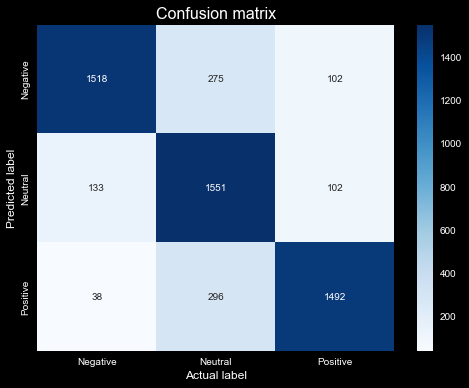

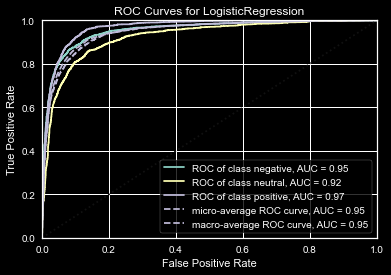

In [33]:
lr =  LogisticRegression(max_iter = 500)
check_scores(lr, X_train, X_test, y_train, y_test)

# KNeighborsClassifier

		 KNeighborsClassifier
Accuracy Score : 0.6028690757218086


              precision    recall  f1-score   support

           0       0.54      0.05      0.10      1895
           1       0.52      0.89      0.65      1786
           2       0.72      0.89      0.80      1826

    accuracy                           0.60      5507
   macro avg       0.59      0.61      0.52      5507
weighted avg       0.59      0.60      0.51      5507



Confusion Matrix : 
[[  99 1315  481]
 [  54 1587  145]
 [  29  163 1634]]


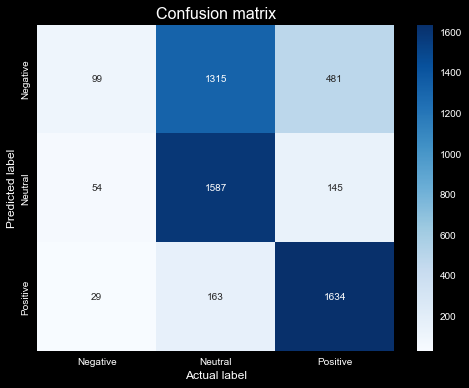

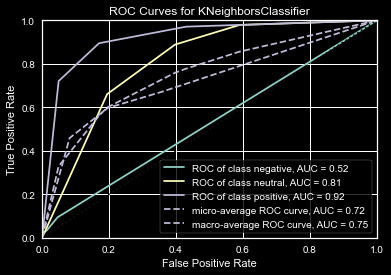

In [34]:
kn = KNeighborsClassifier(3)
check_scores(kn, X_train, X_test, y_train, y_test)

# SVC

		 SVC
Accuracy Score : 0.8774287270746323


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1895
           1       0.86      0.82      0.84      1786
           2       0.96      0.84      0.90      1826

    accuracy                           0.88      5507
   macro avg       0.88      0.88      0.88      5507
weighted avg       0.88      0.88      0.88      5507



Confusion Matrix : 
[[1827   41   27]
 [ 276 1466   44]
 [  92  195 1539]]


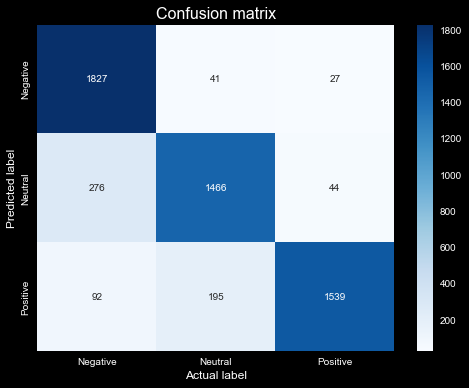

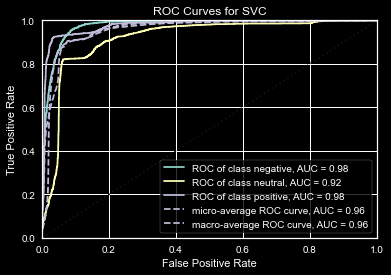

In [35]:
svc = SVC()
check_scores(svc, X_train, X_test, y_train, y_test)

# DecisionTreeClassifier

		 DecisionTreeClassifier
Accuracy Score : 0.802978027964409


              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1895
           1       0.76      0.78      0.77      1786
           2       0.85      0.86      0.86      1826

    accuracy                           0.80      5507
   macro avg       0.80      0.80      0.80      5507
weighted avg       0.80      0.80      0.80      5507



Confusion Matrix : 
[[1465  289  141]
 [ 265 1391  130]
 [  99  161 1566]]


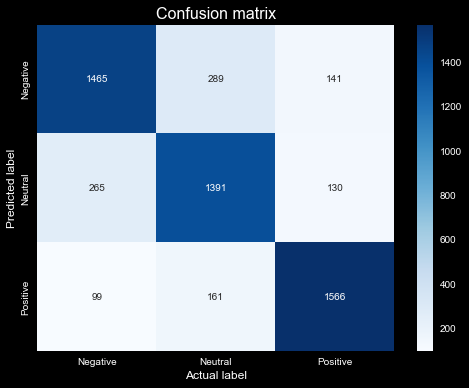

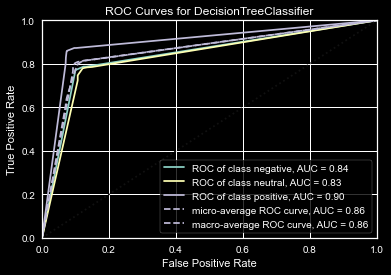

In [36]:
dt = DecisionTreeClassifier()
check_scores(dt, X_train, X_test, y_train, y_test)

# RandomForestClassifier

		 RandomForestClassifier
Accuracy Score : 0.8770655529326312


              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1895
           1       0.83      0.87      0.85      1786
           2       0.91      0.92      0.92      1826

    accuracy                           0.88      5507
   macro avg       0.88      0.88      0.88      5507
weighted avg       0.88      0.88      0.88      5507



Confusion Matrix : 
[[1587  218   90]
 [ 150 1561   75]
 [  41  103 1682]]


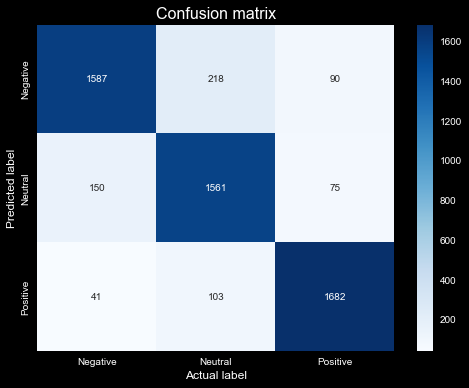

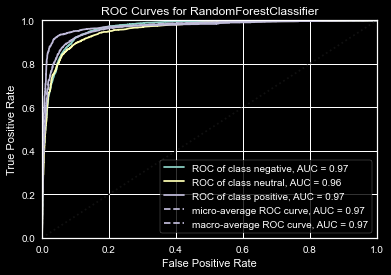

In [37]:
rf = RandomForestClassifier(n_estimators=200)
check_scores(rf, X_train, X_test, y_train, y_test)

# GradientBoostingClassifier

		 GradientBoostingClassifier
Accuracy Score : 0.7354276375522063


              precision    recall  f1-score   support

           0       0.81      0.69      0.74      1895
           1       0.62      0.79      0.70      1786
           2       0.82      0.73      0.77      1826

    accuracy                           0.74      5507
   macro avg       0.75      0.74      0.74      5507
weighted avg       0.75      0.74      0.74      5507



Confusion Matrix : 
[[1302  478  115]
 [ 202 1412  172]
 [ 103  387 1336]]


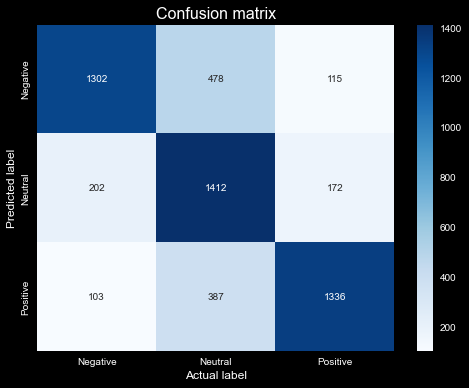

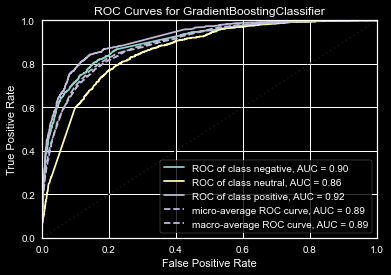

In [38]:
gb = GradientBoostingClassifier()
check_scores(gb, X_train, X_test, y_train, y_test)

# XGBClassifier

		 XGBClassifier
[12:18:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score : 0.8084256400944253


              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1895
           1       0.72      0.82      0.77      1786
           2       0.86      0.82      0.84      1826

    accuracy                           0.81      5507
   macro avg       0.81      0.81      0.81      5507
weighted avg       0.81      0.81      0.81      5507



Confusion Matrix : 
[[1481  317   97]
 [ 181 1467  138]
 [  74  248 1504]]


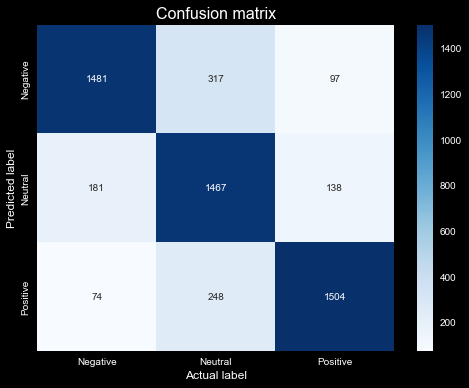

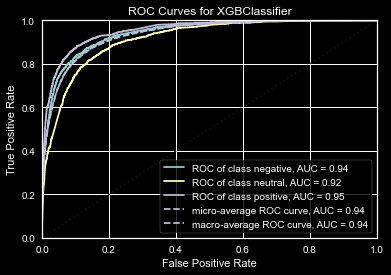

In [39]:
xgb = XGBClassifier()
check_scores(xgb, X_train, X_test, y_train, y_test)

# AdaBoostClassifier

		 AdaBoostClassifier
Accuracy Score : 0.7034683130561104


              precision    recall  f1-score   support

           0       0.83      0.60      0.70      1895
           1       0.57      0.77      0.66      1786
           2       0.79      0.74      0.77      1826

    accuracy                           0.70      5507
   macro avg       0.73      0.71      0.71      5507
weighted avg       0.73      0.70      0.71      5507



Confusion Matrix : 
[[1136  634  125]
 [ 175 1383  228]
 [  59  412 1355]]


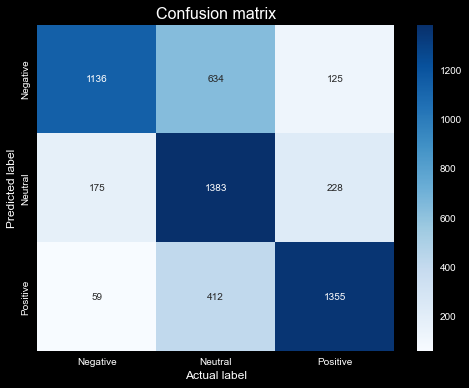

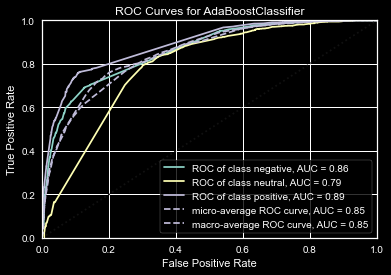

In [40]:
ada = AdaBoostClassifier()
check_scores(ada, X_train, X_test, y_train, y_test)

# MultinomialNB

		 MultinomialNB
Accuracy Score : 0.8211367350644634


              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1895
           1       0.82      0.72      0.76      1786
           2       0.86      0.90      0.88      1826

    accuracy                           0.82      5507
   macro avg       0.82      0.82      0.82      5507
weighted avg       0.82      0.82      0.82      5507



Confusion Matrix : 
[[1607  188  100]
 [ 352 1278  156]
 [  91   98 1637]]


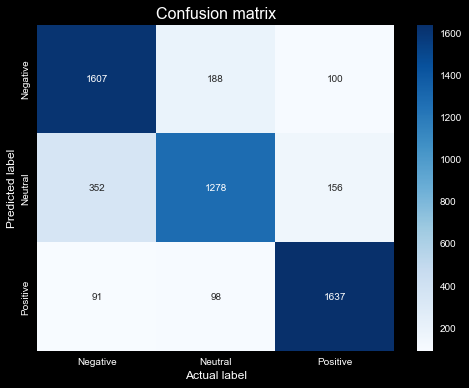

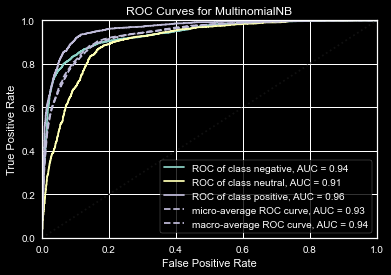

In [41]:
nb = MultinomialNB()
check_scores(nb, X_train, X_test, y_train, y_test)

# LSTM 

In [42]:
# We used TFIDF 
tfid.get_feature_names()

['aa',
 'aadavantage',
 'aadelay',
 'aadv',
 'aadvantage',
 'aafail',
 'aal',
 'aalwayslate',
 'aand',
 'aaron',
 'aateam',
 'ab',
 'aback',
 'abandon',
 'abandoned',
 'abandonment',
 'abassinet',
 'abbreve',
 'abc',
 'abcletjetbluestreamfeed',
 'abcnews',
 'abducted',
 'abi',
 'abilities',
 'ability',
 'able',
 'aboard',
 'aboout',
 'abounds',
 'abq',
 'abroad',
 'absolute',
 'absolutely',
 'absorb',
 'absorber',
 'absoulutely',
 'absurd',
 'absurdity',
 'absurdly',
 'abt',
 'abundance',
 'abuse',
 'abused',
 'abysmal',
 'ac',
 'acarl',
 'acc',
 'accelerate',
 'accept',
 'acceptable',
 'accepted',
 'accepting',
 'acces',
 'access',
 'accessibility',
 'accessible',
 'accessing',
 'accident',
 'accidentally',
 'accidents',
 'accomidating',
 'accommodate',
 'accommodated',
 'accommodates',
 'accommodating',
 'accommodation',
 'accommodations',
 'accompaniments',
 'accompany',
 'accomplish',
 'accomplished',
 'according',
 'accordingly',
 'account',
 'accountability',
 'accountable',
 'ac

In [43]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['final_text'][3])
X, tokenizer = tokenize_pad_sequences(df['final_text'])
print('After Tokenization & Padding \n', X[3])

Before Tokenization & Padding 
 really aggressive blast obnoxious entertainment guests faces amp little recourse
After Tokenization & Padding 
 [  56 3316 4097 4098  835 2810 3317   12  366 2457    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [44]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [46]:
y = pd.get_dummies(df['airline_sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (8784, 50) (8784, 3)
Validation Set -> (2928, 50) (2928, 3)
Test Set -> (2928, 50) (2928, 3)


In [47]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [48]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

2022-09-23 12:33:12.689957: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


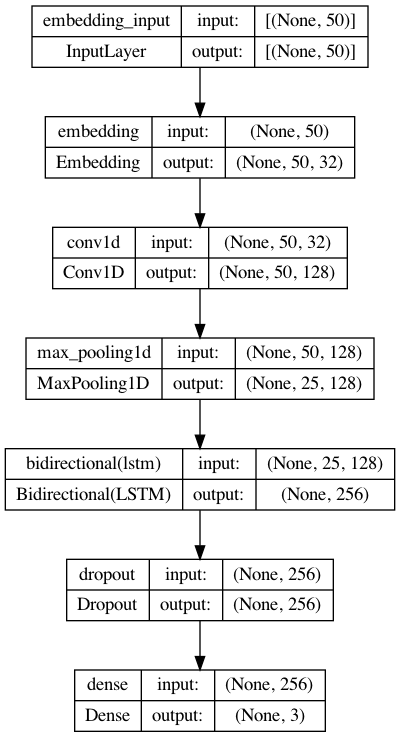

In [49]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [50]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model
#num_epochs = 8
batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 50, 128)           12416     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 128)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 3)                 7

In [51]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.7473
Precision : 0.7770
Recall    : 0.7141
F1 Score  : 0.7443


In [52]:
# Save the model architecture & the weights
model.save('lstm_model.h5')
print('LSTM model saved')

LSTM model saved


In [51]:
# Save Random Forest Model too
filename_rf = 'random_forest_model.pkl'
pickle.dump(rf, open(filename_rf, 'wb'))

In [52]:
# Save SVC Model
filename_svc = 'svc_model.pkl'
pickle.dump(svc, open(filename_svc, 'wb'))

In [54]:
from keras.models import load_model

# Load model for LSTM
model = load_model('lstm_model.h5')

def predict_class_lstm(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [56]:
predict_class_lstm(['"I hate when I have to call and wake people up'])
#predict_class_rf(['"I hate when I have to call and wake people up'])

1/1 [==============================] - 0s 21ms/step
The predicted sentiment is Negative


In [57]:
predict_class_lstm(['The food was meh'])
#predict_class_rf(['The food was meh'])

1/1 [==============================] - 0s 21ms/step
The predicted sentiment is Neutral


In [58]:
predict_class_lstm(['Best food provided'])
#predict_class_rf(['Best food provided'])

1/1 [==============================] - 0s 22ms/step
The predicted sentiment is Positive


In [60]:
# ## Load RF Model

# loaded_rf_model = pickle.load(open(filename_rf, 'rb'))

In [61]:
# 0 - Negative
# 1 - Neutral
# 2 - Positive

In [62]:
X_neww = df['final_text']
Y_neww = df['airline_sentiment']

In [63]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer2 = TweetTokenizer()
vectorizer2 = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer2.tokenize)

# X_neww2=["".join(review) for review in X_neww.values]
vectorizer2.fit(X_neww)


# # X_test2=["".join(review) for review in X_test1.values]
# # vectorizer1.fit(X_test2)
# #vectorization
# X_tfid_neww = vectorizer2.transform(X_neww2)


# # test_vectorized1 = vectorizer2.transform(X_test2)

X_tfid_neww = vectorizer2.fit_transform(X_neww)

In [64]:
# saving Vecorizer
with open('vectorizer.pickle', 'wb') as handle:
    pickle.dump(vectorizer2, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [65]:
## Performance after handling the imbalance
# Handling imbalanced using SMOTE
smote = SMOTE()
x_neww_sm,y_neww_sm = smote.fit_resample(X_tfid_neww,Y_neww)

In [67]:
X_train_neww, X_test_neww, y_train_neww, y_test_neww=train_test_split(x_neww_sm,y_neww_sm,test_size=0.2, random_state=42)

In [69]:
svm = SVC(probability=True)
svm.fit(X_train_neww,y_train_neww)
print(classification_report(svm.predict(X_test_neww) , y_test_neww))
print("accuracy: ",accuracy_score( svm.predict(X_test_neww) , y_test_neww ))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      2340
           1       0.79      0.85      0.82      1643
           2       0.81      0.97      0.88      1524

    accuracy                           0.86      5507
   macro avg       0.86      0.87      0.86      5507
weighted avg       0.88      0.86      0.86      5507

accuracy:  0.8627201743235882


In [70]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train_neww,y_train_neww)
print(classification_report(rf_model.predict(X_test_neww) , y_test_neww))
print("accuracy: ",accuracy_score( rf_model.predict(X_test_neww) , y_test_neww ))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1715
           1       0.90      0.81      0.86      1982
           2       0.92      0.93      0.93      1810

    accuracy                           0.88      5507
   macro avg       0.88      0.89      0.88      5507
weighted avg       0.89      0.88      0.88      5507

accuracy:  0.8834211004176503


In [71]:
# Save SVC Model
filename_svm = 'svm_model.pkl'
pickle.dump(svm, open(filename_svm, 'wb'))

In [73]:
# Save RandomForest Model
filename_rf = 'randomforest_model.pkl'
pickle.dump(rf_model, open(filename_rf, 'wb'))

In [75]:
#Load the Model
loaded_rf_model = pickle.load(open("randomforest_model.pkl", "rb"))
loaded_svm_model = pickle.load(open("svm_model.pkl", "rb"))

In [76]:
# Load Vectorizer
with open('vectorizer.pickle', 'rb') as handle:
    loaded_vectorizer = pickle.load(handle)

In [82]:
#create a function  that takes a text as input and return the suitable sentiment 
def detect_sentment_rf(text):
            #vectorize the text
            print (text)
            print (type(text))
            test = loaded_vectorizer.transform([text])
            l=loaded_rf_model.predict(test)
            #Check for the prediction probability
            pred_proba=loaded_rf_model.predict_proba(test)
            pred_percentage_for_all=dict(zip(loaded_rf_model.classes_,pred_proba[0]))
            print("Prediction using RandomForest:  : {} , Prediction Score : {}".format(l[0],np.max(pred_proba)))
            print()
            print(pred_percentage_for_all)

In [83]:
detect_sentment_rf("it's good to see you!")
detect_sentment_rf("i'm not satisfied")
detect_sentment_rf("i took a flight today!")

it's good to see you!
<class 'str'>
Prediction using RandomForest:  : 1 , Prediction Score : 0.525

{0: 0.065, 1: 0.525, 2: 0.41}
i'm not satisfied
<class 'str'>
Prediction using RandomForest:  : 1 , Prediction Score : 0.71806825290171

{0: 0.1507814213923054, 1: 0.71806825290171, 2: 0.13115032570598434}
i took a flight today!
<class 'str'>
Prediction using RandomForest:  : 1 , Prediction Score : 0.5693112957304133

{0: 0.3799387042695866, 1: 0.5693112957304133, 2: 0.05075}


In [84]:
#create a function  that takes a text as input and return the suitable sentiment 
def detect_sentment_svm(text):
            #vectorize the text
            print (text)
            print (type(text))
            test = loaded_vectorizer.transform([text])
            l=loaded_svm_model.predict(test)
            #Check for the prediction probability
            pred_proba=loaded_svm_model.predict_proba(test)
            pred_percentage_for_all=dict(zip(loaded_svm_model.classes_,pred_proba[0]))
            print("Prediction using RandomForest:  : {} , Prediction Score : {}".format(l[0],np.max(pred_proba)))
            print()
            print(pred_percentage_for_all)

In [85]:
detect_sentment_svm("it's good to see you!")
detect_sentment_svm("i'm not satisfied")
detect_sentment_svm("i took a flight today!")

it's good to see you!
<class 'str'>
Prediction using RandomForest:  : 2 , Prediction Score : 0.99589830561213

{0: 4.844305321542635e-05, 1: 0.0040532513346547595, 2: 0.99589830561213}
i'm not satisfied
<class 'str'>
Prediction using RandomForest:  : 0 , Prediction Score : 0.5718476204879758

{0: 0.5718476204879758, 1: 0.2744799803592147, 2: 0.1536723991528094}
i took a flight today!
<class 'str'>
Prediction using RandomForest:  : 0 , Prediction Score : 0.8222331830404935

{0: 0.8222331830404935, 1: 0.11213374635509471, 2: 0.06563307060441187}


# Below are Test Stuff so not run as part always

### Test Stuff

In [59]:
df.head()

tweet_id  airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513                  1                        1.0000   
1  570301130888122368                  2                        0.3486   
2  570301083672813571                  1                        0.6837   
3  570301031407624196                  0                        1.0000   
4  570300817074462722                  0                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

                                          final_text  
0                                               said  
1            plus added commercials experience tacky  
2             today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing

In [60]:
X_new = df['final_text']
Y_new = df['airline_sentiment']

In [61]:
X_train1, X_test1, y_train1, y_test1=train_test_split(X_new,Y_new,test_size=0.2, random_state=42)

In [62]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
tokenizer1 = TweetTokenizer()
vectorizer1 = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer1.tokenize)
X_train2=["".join(review) for review in X_train1.values]
vectorizer1.fit(X_train2)
X_test2=["".join(review) for review in X_test1.values]
vectorizer1.fit(X_test2)
#vectorization
train_vectorized1 = vectorizer1.transform(X_train2)
test_vectorized1 = vectorizer1.transform(X_test2)

In [64]:
svm = SVC(probability=True)
svm.fit(train_vectorized1,y_train1)
print(classification_report(svm.predict(test_vectorized1) , y_test1))
print("accuracy: ",accuracy_score( svm.predict(test_vectorized1 ) , y_test1 ))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      2451
           1       0.28      0.74      0.40       219
           2       0.49      0.86      0.62       258

    accuracy                           0.76      2928
   macro avg       0.58      0.78      0.63      2928
weighted avg       0.88      0.76      0.80      2928

accuracy:  0.7612704918032787


In [65]:
#create a function  that takes a text as input and return the suitable sentiment 
def detect_sentment(text):
            #vectorize the text
            test = vectorizer1.transform([text])
            l=svm.predict(test)
            #Check for the prediction probability
            pred_proba=svm.predict_proba(test)
            pred_percentage_for_all=dict(zip(svm.classes_,pred_proba[0]))
            print("Prediction using SVM:  : {} , Prediction Score : {}".format(l[0],np.max(pred_proba)))
            print()
            print(pred_percentage_for_all)


In [66]:
detect_sentment("it's good to see you!")

Prediction using SVM:  : 2 , Prediction Score : 0.8740243361731653

{0: 0.018253436681138293, 1: 0.10772222714569653, 2: 0.8740243361731653}


In [67]:
detect_sentment("i'm not satisfied")

Prediction using SVM:  : 0 , Prediction Score : 0.4599540754440543

{0: 0.4599540754440543, 1: 0.39342377059754874, 2: 0.14662215395839676}


In [68]:
detect_sentment("i took a flight today!")

Prediction using SVM:  : 0 , Prediction Score : 0.6545920551138966

{0: 0.6545920551138966, 1: 0.24116959770489793, 2: 0.10423834718120543}


In [141]:
# 0 - Negative
# 1 - Neutral
# 2 - Positive

In [161]:
## So here looks like we are splitting the data before tokenizing it. We will tokenize it and then 
#handle the imbalance and then split it.

In [81]:
X_neww = df['final_text']
Y_neww = df['airline_sentiment']

In [82]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer2 = TweetTokenizer()
vectorizer2 = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer2.tokenize)

# X_neww2=["".join(review) for review in X_neww.values]
vectorizer2.fit(X_neww)


# # X_test2=["".join(review) for review in X_test1.values]
# # vectorizer1.fit(X_test2)
# #vectorization
# X_tfid_neww = vectorizer2.transform(X_neww2)


# # test_vectorized1 = vectorizer2.transform(X_test2)

X_tfid_neww = vectorizer2.fit_transform(X_neww)

In [83]:
# saving Vecorizer
with open('vectorizer.pickle', 'wb') as handle:
    pickle.dump(vectorizer2, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [84]:
X_tfid_neww

<14640x90228 sparse matrix of type '<class 'numpy.float64'>'
	with 236228 stored elements in Compressed Sparse Row format>

In [85]:
## Performance after handling the imbalance
# Handling imbalanced using SMOTE
smote = SMOTE()
x_neww_sm,y_neww_sm = smote.fit_resample(X_tfid_neww,Y_neww)

In [73]:
X_train_neww, X_test_neww, y_train_neww, y_test_neww=train_test_split(x_neww_sm,y_neww_sm,test_size=0.2, random_state=42)

In [86]:
svm_new = SVC(probability=True)
svm_new.fit(X_train_neww,y_train_neww)
print(classification_report(svm.predict(X_test_neww) , y_test_neww))
print("accuracy: ",accuracy_score( svm.predict(X_test_neww) , y_test_neww ))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      2324
           1       0.78      0.86      0.82      1633
           2       0.82      0.96      0.88      1550

    accuracy                           0.86      5507
   macro avg       0.86      0.87      0.86      5507
weighted avg       0.88      0.86      0.87      5507

accuracy:  0.8647176321045942


In [87]:
# Save SVC Model
filename_svc = 'svm_new_model.pkl'
pickle.dump(svm_new, open(filename_svc, 'wb'))

In [89]:
#create a function  that takes a text as input and return the suitable sentiment 
def detect_sentment(text):
            #vectorize the text
            print (text)
            print (type(text))
            test = vectorizer2.transform([text])
            l=svm_new.predict(test)
            #Check for the prediction probability
            pred_proba=svm_new.predict_proba(test)
            pred_percentage_for_all=dict(zip(svm.classes_,pred_proba[0]))
            print("Prediction using SVM:  : {} , Prediction Score : {}".format(l[0],np.max(pred_proba)))
            print()
            print(pred_percentage_for_all)

In [90]:
detect_sentment("it's good to see you!")
detect_sentment("i'm not satisfied")
detect_sentment("i took a flight today!")

it's good to see you!
<class 'str'>
Prediction using SVM:  : 2 , Prediction Score : 0.9972836498610453

{0: 3.9829752529064116e-05, 1: 0.0026765203864254523, 2: 0.9972836498610453}
i'm not satisfied
<class 'str'>
Prediction using SVM:  : 0 , Prediction Score : 0.5738864839243679

{0: 0.5738864839243679, 1: 0.2733223393603363, 2: 0.1527911767152959}
i took a flight today!
<class 'str'>
Prediction using SVM:  : 0 , Prediction Score : 0.7946978334592565

{0: 0.7946978334592565, 1: 0.13445391672869947, 2: 0.07084824981204416}
